# 2. Build a BenchMark model for the given dataset

In [ ]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("nyc_taxi_trip_duration.csv")
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [ ]:
#simple predictive model
df["trip_duration_mean"]=df["trip_duration"].mean()
df["trip_duration_mean"].head()

0    952.229133
1    952.229133
2    952.229133
3    952.229133
4    952.229133
Name: trip_duration_mean, dtype: float64

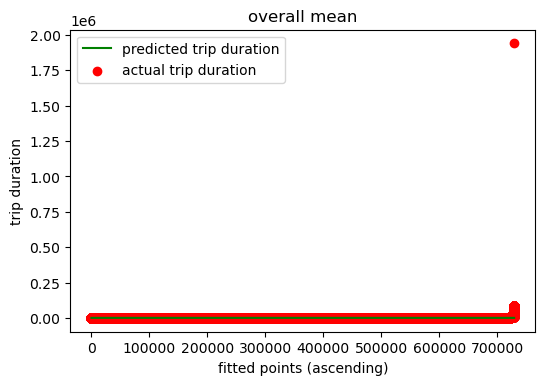

In [ ]:
plt.figure(dpi=100)
k = range(0,len(df))
plt.scatter(k,df["trip_duration"].sort_values(),color="red",label="actual trip duration")
plt.plot(k,df["trip_duration_mean"].sort_values(),color ="green",label="predicted trip duration")
plt.xlabel("fitted points (ascending)")
plt.ylabel("trip duration")
plt.title("overall mean")
plt.legend()

From the above simple predictive model we can draw an insight that the values of actual trip duration and predicted trip duration are almost same.

In [ ]:
#importing the shuffle library
from sklearn.utils import shuffle

# Shuffling the Dataset
df = shuffle(df, random_state = 42)

#creating 4 divisions
div = int(df.shape[0]/4)

# 3 parts to train set and 1 part to test set
train = df.loc[:3*div+1,:]
test = df.loc[3*div+1:]

In [ ]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_duration_mean
469114,id2380741,2,2016-05-21 10:40:14,2016-05-21 10:51:11,1,-73.981796,40.762035,-73.972267,40.781265,N,657,952.229133
694852,id3946961,2,2016-01-08 18:49:27,2016-01-08 18:52:42,5,-73.980965,40.747677,-73.982704,40.741161,N,195,952.229133
696324,id0833913,1,2016-05-22 00:54:10,2016-05-22 01:08:10,1,-73.951065,40.782722,-73.867691,40.833664,N,840,952.229133
356496,id1336849,1,2016-06-11 10:32:12,2016-06-11 10:38:50,1,-73.987625,40.762791,-73.973518,40.762909,N,398,952.229133
645318,id1610858,1,2016-04-03 10:45:51,2016-04-03 10:57:13,3,-73.964333,40.792503,-73.988609,40.758369,N,682,952.229133


In [ ]:
test.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_duration_mean
546991,id2240736,1,2016-05-25 07:59:16,2016-05-25 08:05:02,1,-73.991364,40.732590,-74.000526,40.742283,N,346,952.229133
43126,id1423404,1,2016-01-18 12:17:13,2016-01-18 12:21:13,2,-73.966225,40.768059,-73.967606,40.763073,N,240,952.229133
641450,id1317268,2,2016-03-02 18:39:01,2016-03-02 18:50:12,1,-73.994926,40.766018,-74.004219,40.742523,N,671,952.229133
611380,id3335546,1,2016-04-06 19:17:20,2016-04-06 19:18:03,1,-73.974388,40.793781,-73.976006,40.792339,N,43,952.229133
62690,id2174190,2,2016-06-21 18:35:31,2016-06-21 18:40:56,3,-73.963440,40.798557,-73.979736,40.777878,N,325,952.229133


In [ ]:
# storing simple mean in a new column in the test set as "simple_mean"
df["trip_duration_mean"]=df["trip_duration"].mean()
df["trip_duration_mean"]

469114    952.229133
694852    952.229133
696324    952.229133
356496    952.229133
645318    952.229133
             ...    
259178    952.229133
365838    952.229133
131932    952.229133
671155    952.229133
121958    952.229133
Name: trip_duration_mean, Length: 729322, dtype: float64

In [ ]:
#calculating RMSE
from sklearn.metrics import mean_squared_error as mse
from math import sqrt

trip_mean_error = sqrt((mse(test['trip_duration'] , test['trip_duration_mean'])))
trip_mean_error

3205.4643559533

In [ ]:
#trip duration mean with respect to the mean of pickup longitude
pickuplong = pd.pivot_table(train, values='trip_duration', index = ['pickup_longitude'], aggfunc=np.mean)
pickuplong

,trip_duration
pickup_longitude,
-79.569733,548.0
-78.547401,279.0
-77.896019,417.0
-77.039436,60.0
-75.455917,23440.0
...,...
-72.809669,792.0
-72.591019,799.0
-71.881645,632.0


In [ ]:
# initializing new column to zero
test['pickuplong'] = 0

# For every unique entry in pickup longitude
for i in train['pickup_longitude'].unique():
  # Assign the mean value corresponding to unique entry
  test['pickuplong'][test['pickup_longitude'] == str(i)] = train['trip_duration'][train['pickup_longitude'] == str(i)].mean()

In [ ]:
#calculating RMSE
pickup_error = sqrt(mse(test['trip_duration'] , test['pickuplong'] ))
pickup_error

3344.6811870117776

The RMSE of the trip duration mean with respect to the mean of pickup longitude is higher than the simple mean of the trip duration

In [ ]:
#trip duration mean with respect to the mean of pickup latitude
pickuplat =pd.pivot_table(train, values='trip_duration', index = ['pickup_latitude'], aggfunc=np.mean)
pickuplat

,trip_duration
pickup_latitude,
34.712234,875.0
37.777771,417.0
38.898849,60.0
39.457882,329.0
39.803932,23440.0
...,...
42.458942,224.0
43.139652,799.0
43.486885,674.0


In [ ]:
# initializing new column to zero
test['pickuplat'] = 0

# For every unique entry in pickup latitude
for i in train['pickup_latitude'].unique():
  # Assign the mean value corresponding to unique entry
  test['pickuplat'][test['pickup_latitude'] == str(i)] = train['trip_duration'][train['pickup_latitude'] == str(i)].mean()

In [ ]:
#calculating mean absolute error
pickuplat_error = sqrt(mse(test['trip_duration'] , test['pickuplat'] ))
pickuplat_error

3344.6811870117776

The pick up latitude error is same as pick up longitude error

In [ ]:
##trip duration mean with respect to the mean of passenger count
pass_count = pd.pivot_table(train, values='trip_duration', index = ["passenger_count"], aggfunc=np.mean)
pass_count

,trip_duration
passenger_count,
0,334.733333
1,919.236280
2,1000.159939
3,1034.393923
4,1028.731304
5,1078.708147
6,1080.694100


In [ ]:
# initializing new column to zero
test['pass_count'] = 0

# For every unique entry in passenger count
for i in train['passenger_count'].unique():
  # Assign the mean value corresponding to unique entry
  test['pass_count'][test['passenger_count'] == str(i)] = train['trip_duration'][train['passenger_count'] == str(i)].mean()

In [ ]:
pass_count_error = sqrt(mse(test['trip_duration'] , test['pickuplat'] ))
pass_count_error

3344.6811870117776

In [ ]:
##trip duration mean with respect to the mean of store_and_fwd_flag
store_and_fwd = pd.pivot_table(train, values='trip_duration', index = ["store_and_fwd_flag"], aggfunc=np.mean)
store_and_fwd

,trip_duration
store_and_fwd_flag,
N,950.792228
Y,1094.609831


In [ ]:
# initializing new column to zero
test['store_and_fwd'] = 0

# For every unique entry in pickup latitude
for i in train['store_and_fwd_flag'].unique():
  # Assign the mean value corresponding to unique entry
  test['store_and_fwd'][test['store_and_fwd_flag'] == str(i)] = train['trip_duration'][train['store_and_fwd_flag'] == str(i)].mean()

In [ ]:
str_and_fwd_error = sqrt(mse(test['store_and_fwd'] , test['trip_duration'] ))
str_and_fwd_error

3205.4474618943213

In [ ]:
drop_off_lat = pd.pivot_table(train, values='trip_duration', index = ["dropoff_latitude"], aggfunc=np.mean)
drop_off_lat

,trip_duration
dropoff_latitude,
32.181141,875.0
37.777771,417.0
38.478298,804.0
38.898849,60.0
38.946033,282.0
...,...
42.090183,548.0
42.458942,224.0
43.139652,799.0


In [ ]:
# initializing new column to zero
test['drop_off_lat'] = 0

# For every unique entry in pickup latitude
for i in train['dropoff_latitude'].unique():
  # Assign the mean value corresponding to unique entry
  test['drop_off_lat'][test['dropoff_latitude'] == str(i)] = train['trip_duration'][train['dropoff_latitude'] == str(i)].mean()

In [ ]:
drop_lat_error = sqrt(mse(test['drop_off_lat'] , test['trip_duration'] ))
drop_lat_error

3344.6811870117776

The "drop off latitude" error is lesser than the  pick up latitude error and pick up longitude error

In [ ]:
combo = pd.pivot_table(train, values = 'trip_duration', index = ['passenger_count','pickup_latitude'], aggfunc = np.mean)
combo

trip_duration
passenger_count pickup_latitude               
0               40.598701                  3.0
                40.636040                  8.0
                40.655457                  3.0
                40.686878                 78.0
                40.705029                  8.0
...                                        ...
6               40.864143               1380.0
                40.865341                553.0
                40.867794                182.0
                40.871498                445.0
                40.874359                626.0

[110116 rows x 1 columns]

# conclusions
1. The error of simple mean of trip duration is 3205.4643 where as the str_fwd_error is 3205.44746
    there's only slight difference in the errors between the two.
2. The pickuplong error , pickuplat error and pass_count error is 3344.68118   
